In [25]:
import pandas as pd

# Read the data
data = pd.read_csv('/Users/Rich/Desktop/Kaggle/KaggleTeamLearn/Rich/Internediate ML/melb_data.csv')

# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Select target
y = data.Price

這邊要講的是交叉驗證(Cross-Validation),此方法是拿來驗證模型, 我們可以想像在驗證模型時需用valid_X,但很衰的是如果valid_X在切的時候剛好都切的和train_X很像, 那模型就很精準, 可是實際上誤差很大, 所以交叉驗證就是切好多份, 去算平均的誤差, 來防止這種事情發生

補充:訓練集越大測試集就越小這很好理解, 但會發生什麼事, 第一模型可能過適, 第二驗證集太小無法代表原數據集
那測試及越大相對訓練就小會發生 1.模型很爛 導致預測很爛

使用交叉驗證時機? 
大家可以想一下

以下是example

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

In [27]:
#cross_val_score在sklearn.model_seletion中
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [301628.7893587  303164.4782723  287298.331666   236061.84754543
 260383.45111427]


在这段代码中，我们使用了负平均绝对误差（negative mean absolute error）作为评估指标。这是因为 Scikit-learn 中的交叉验证 API 默认使用的是“越大越好”的评估指标，而我们通常希望的是误差越小越好。因此，需要对评估指标取相反数，才能得到正确的结果。


In [28]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
277707.3795913405


以下是習題

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv('/Users/Rich/Desktop/Kaggle/KaggleTeamLearn/Rich/Internediate ML/home-data-for-ml-course/train.csv', index_col='Id')
test_data = pd.read_csv('/Users/Rich/Desktop/Kaggle/KaggleTeamLearn/Rich/Internediate ML/home-data-for-ml-course/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [30]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [32]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 18276.410356164386


In [33]:
# 完成惡函數, 使用cross_val_score, 切成3份
# 需使用pipeline, 資料預處理使用SimpleImputer
# 模型使用RandomForestRegressor(random_state=0)
# return MAE
def get_score(n_estimators):
    
    return 


In [34]:
# 用迴圈早出最佳參數
# 使用python dictionary, key是參數, value是MAE
#results = 

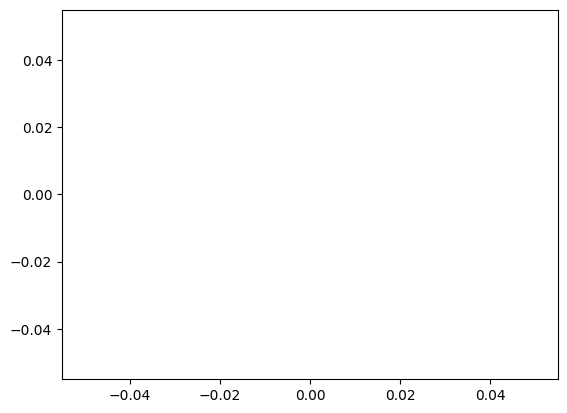

In [35]:
import matplotlib.pyplot as plt

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [36]:
# 最佳參數
#n_estimators_best =